In [1]:
from pyqpp import *
from matplotlib import pyplot as plt

In [2]:
qc = QCircuit(1, 1)
qc.gate(gates.H, 0)
qc.measure_all()

[QCircuit nq: 1, nc: 1, d: 2]
0: SINGLE, target = [0], name = "H"
1: |> MEASURE_MANY, target = [0], c_reg = 0, name = "mZ"

In [3]:
qengine = QEngine(qc)
qengine.execute(1000)

[QEngine] (Sampling)
<QCircuit nq: 1, nc: 1, d: 2>
last probs: [0.5]
last dits: [1]
[Statistics]
	num_reps: 1000
	num_outcomes: 2
	[0]: 517
	[1]: 483

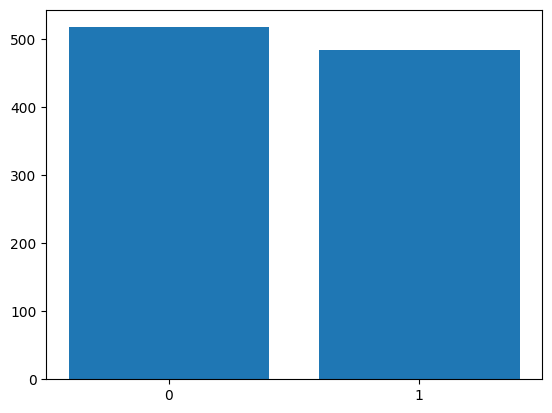

In [4]:
stats = qengine.get_stats()
plt.bar(stats.keys(), stats.values())
plt.show()

In [5]:
qc = QCircuit(2, 2)
qc.gate(gates.H, 0)
qc.CTRL(gates.X, 0, 1)
qc.measure_all()

[QCircuit nq: 2, nc: 2, d: 2]
0: SINGLE, target = [0], name = "H"
1: CTRL, ctrl = [0], target = [1], shift = [0], name = "CTRL-X"
2: |> MEASURE_MANY, target = [0, 1], c_reg = 0, name = "mZ"

In [6]:
qengine = QEngine(qc)
qengine.execute(1000)

[QEngine] (Sampling)
<QCircuit nq: 2, nc: 2, d: 2>
last probs: [0.5, 1]
last dits: [1, 1]
[Statistics]
	num_reps: 1000
	num_outcomes: 2
	[0 0]: 490
	[1 1]: 510

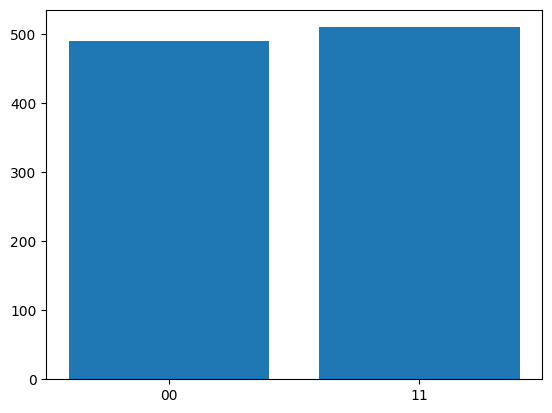

In [7]:
stats = qengine.get_stats()
plt.bar(stats.keys(), stats.values())
plt.show()

In [8]:
qengine = QNoisyEngine_QubitDepolarizingNoise(qc, QubitDepolarizingNoise(0.01))

In [9]:
qengine.execute(1000)

[QNoisyEngine]
<QCircuit nq: 2, nc: 2, d: 2>
last probs: [0.5, 1]
last dits: [1, 1]
[Statistics]
	num_reps: 1000
	num_outcomes: 4
	[0 0]: 477
	[0 1]: 15
	[1 0]: 18
	[1 1]: 490

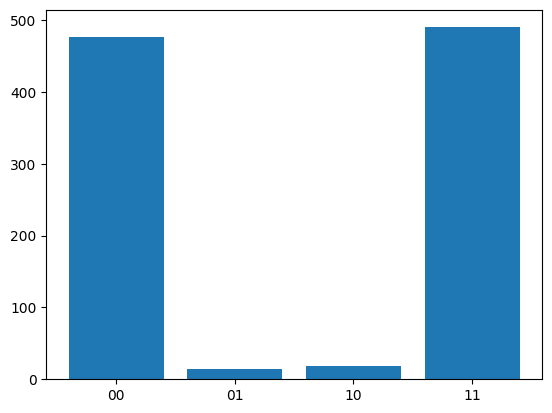

In [10]:
stats = qengine.get_stats()
plt.bar(stats.keys(), stats.values())
plt.show()